# Counting Missing Data

### Step 1. Load the dataset

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sb
%matplotlib inline

In [2]:
sales = pd.read_csv('sales-data.csv.crdownload')

In [3]:
sales.head()

,Store,Date,Temperature,Fuel_Price,MarkDown1,MarkDown2,MarkDown3,MarkDown4,MarkDown5,CPI,Unemployment,IsHoliday
0,1,05/02/2010,42.31,2.572,NaN,NaN,NaN,NaN,NaN,211.096358,8.106,False
1,1,12/02/2010,38.51,2.548,NaN,NaN,NaN,NaN,NaN,211.242170,8.106,True
2,1,19/02/2010,39.93,2.514,NaN,NaN,NaN,NaN,NaN,211.289143,8.106,False
3,1,26/02/2010,46.63,2.561,NaN,NaN,NaN,NaN,NaN,211.319643,8.106,False
4,1,05/03/2010,46.50,2.625,NaN,NaN,NaN,NaN,NaN,211.350143,8.106,False


In [4]:
sales.shape

(1225, 12)

In [5]:
sales.isnull().sum()

Store             0
Date              0
Temperature       0
Fuel_Price        0
MarkDown1       644
MarkDown2       760
MarkDown3       679
MarkDown4       656
MarkDown5       645
CPI              79
Unemployment     79
IsHoliday         1
dtype: int64

### Step 2 - Prepare a NaN tabular data

In [6]:
# Let's drop the column that do not have any NaN/None values
na_counts = sales.drop(columns=['Date', 'Temperature', 'Fuel_Price'], axis=1).isnull().sum()

In [7]:
na_counts

Store             0
MarkDown1       644
MarkDown2       760
MarkDown3       679
MarkDown4       656
MarkDown5       645
CPI              79
Unemployment     79
IsHoliday         1
dtype: int64

In [8]:
na_counts.index.values

array(['Store', 'MarkDown1', 'MarkDown2', 'MarkDown3', 'MarkDown4',
       'MarkDown5', 'CPI', 'Unemployment', 'IsHoliday'], dtype=object)

### Step 3 - Plot the bar chart from the NaN tabular data, and also print values on each bar

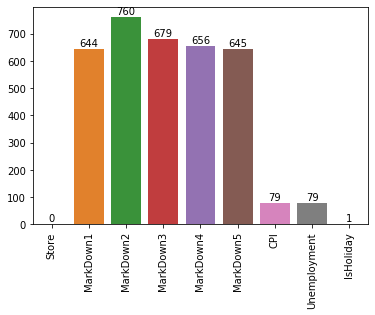

In [9]:
# The first argument to the function below contains the x-values (column names), the second argument the y-values (our counts).
# Refer to the syntax and more example here - https://seaborn.pydata.org/generated/seaborn.barplot.html
sb.barplot(na_counts.index.values, na_counts)

# get the current tick locations and labels
plt.xticks(rotation=90) 

# Logic to print value on each bar
for i in range (na_counts.shape[0]):
    count = na_counts[i]

    # Refer here for details of the text() - https://matplotlib.org/3.1.1/api/_as_gen/matplotlib.pyplot.text.html
    plt.text(i, count+40, count, ha = 'center', va='top')

## Pie Charts

### Example 1. Plot a simple Pie chart

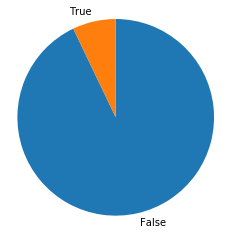

In [10]:
# Use the same pokemon dataset
sorted_counts = sales['IsHoliday'].value_counts()

plt.pie(sorted_counts, labels = sorted_counts.index, startangle = 90, counterclock = False);

# We have the used option `Square`. 
# Though, you can use either one specified here - https://matplotlib.org/api/_as_gen/matplotlib.pyplot.axis.html?highlight=pyplot%20axis#matplotlib-pyplot-axis
plt.axis('square');

### Example 2. Plot a simple Donut plot

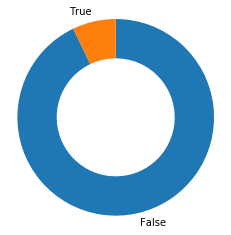

In [11]:
# Use the same pokemon dataset
sorted_counts = sales['IsHoliday'].value_counts()

plt.pie(sorted_counts, labels = sorted_counts.index, startangle = 90, counterclock = False, 
       wedgeprops={'width':0.4});

# We have the used option `Square`. 
# Though, you can use either one specified here - https://matplotlib.org/api/_as_gen/matplotlib.pyplot.axis.html?highlight=pyplot%20axis#matplotlib-pyplot-axis
plt.axis('square');

In [12]:
sales.head()

,Store,Date,Temperature,Fuel_Price,MarkDown1,MarkDown2,MarkDown3,MarkDown4,MarkDown5,CPI,Unemployment,IsHoliday
0,1,05/02/2010,42.31,2.572,NaN,NaN,NaN,NaN,NaN,211.096358,8.106,False
1,1,12/02/2010,38.51,2.548,NaN,NaN,NaN,NaN,NaN,211.242170,8.106,True
2,1,19/02/2010,39.93,2.514,NaN,NaN,NaN,NaN,NaN,211.289143,8.106,False
3,1,26/02/2010,46.63,2.561,NaN,NaN,NaN,NaN,NaN,211.319643,8.106,False
4,1,05/03/2010,46.50,2.625,NaN,NaN,NaN,NaN,NaN,211.350143,8.106,False


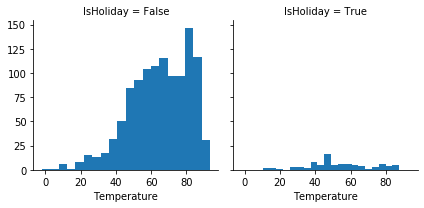

In [32]:
g = sb.FacetGrid(data=sales, col='IsHoliday')
g.map(plt.hist, 'Temperature', bins=20);